In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

 - hello world!

In [50]:
a = os.getcwd()
print(a)

C:\Users\vinit\Desktop\Python


In [4]:
wkdir = os.chdir('/Users/vinit/Desktop/Python')
os.listdir('/Users/vinit/Desktop/Python')

['.ipynb_checkpoints',
 'ecommerce.csv',
 'ecommerce.html',
 'Importing_Data_Python_Cheat_Sheet.pdf',
 'Untitled.ipynb',
 'What is a Python Class (AutoRecovered).docx']

In [5]:
df = pd.read_csv('ecommerce.csv')

In [6]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [9]:
correlation_df = df.corr()

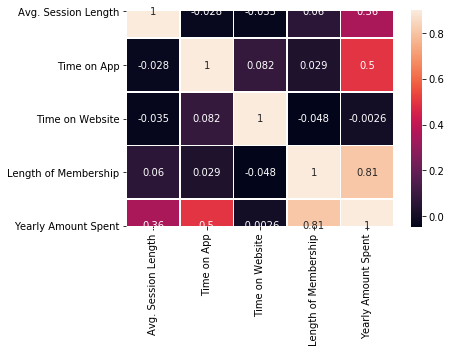

In [10]:
sns.heatmap(correlation_df, vmax = 0.9, linewidths = 0.5, annot= True, square = True,  linecolor = "white" )

In [11]:
correlation_df.style.background_gradient()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1,-0.027826,-0.0349869,0.0602474,0.355088
Time on App,-0.027826,1,0.0823883,0.0291426,0.499328
Time on Website,-0.0349869,0.0823883,1,-0.0475818,-0.00264084
Length of Membership,0.0602474,0.0291426,-0.0475818,1,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.00264084,0.809084,1


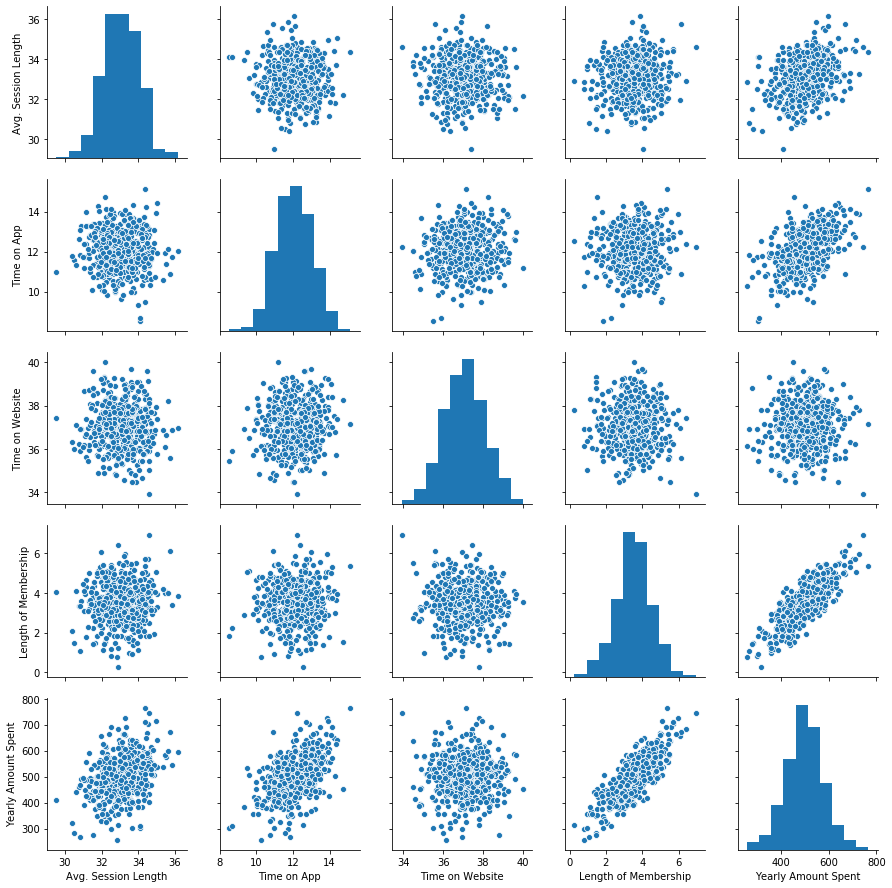

In [12]:
sns.pairplot(df)

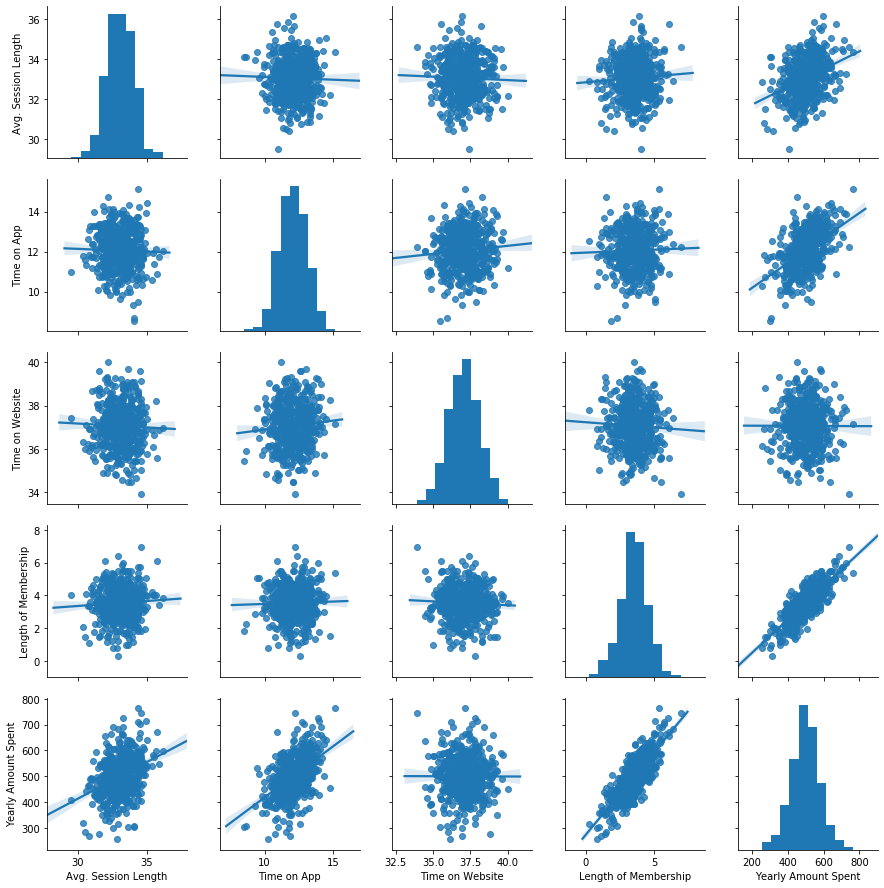

In [13]:
sns.pairplot(df, kind= "reg")

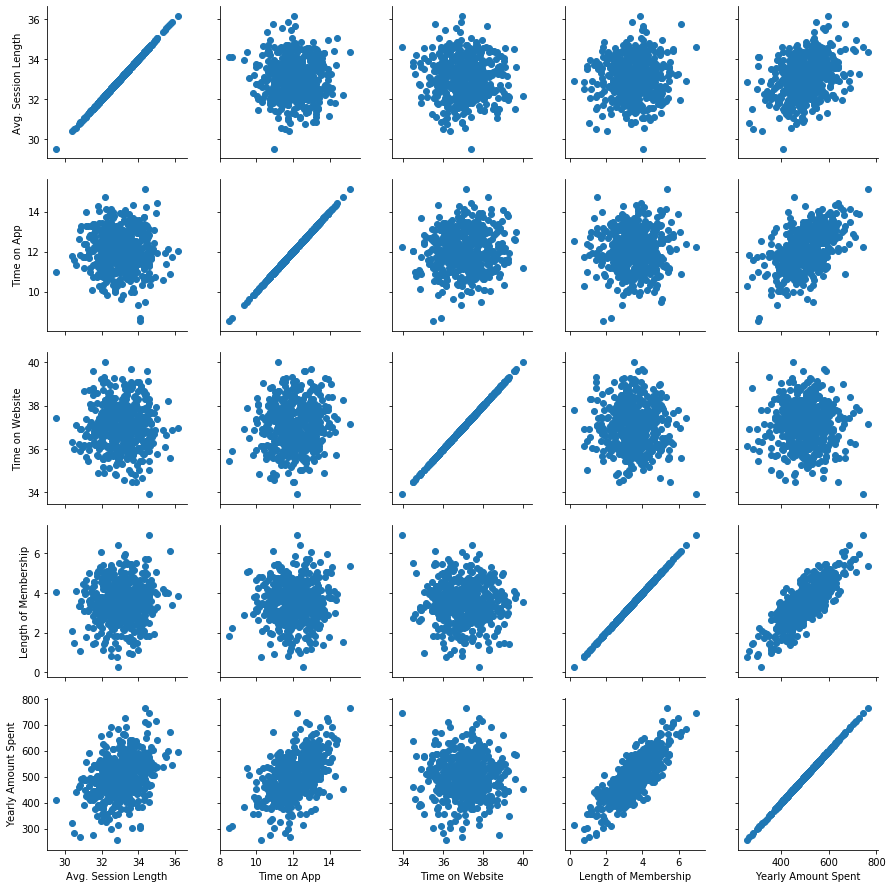

In [14]:
x=sns.PairGrid(df)
x = x.map(plt.scatter)

In [15]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df[['Yearly Amount Spent']]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [20]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.coef_

array([[25.40338237, 39.07669655,  0.24709025, 61.96771706]])

In [23]:
pred_x_test = model.predict(x_test)
prediction = pd.DataFrame(pred_x_test)

Text(0, 0.5, 'y_test')

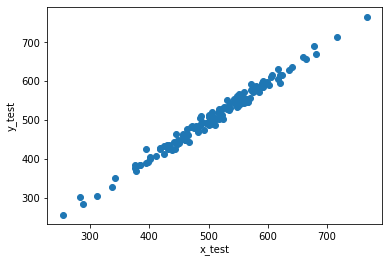

In [26]:
plt.scatter(pred_x_test,y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')

In [35]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(pred_x_test,y_test))
mse = metrics.mean_squared_error(y_test,pred_x_test)
mae = metrics.median_absolute_error(y_test,pred_x_test)

print('rmse = {}'.format(rmse))
print('mse = {}' .format(mse))
print('mae = {}' .format(mae))

rmse = 10.29305982878902
mse = 105.94708063903025
mae = 7.017248389798283


Text(0, 0.5, 'Residuals')

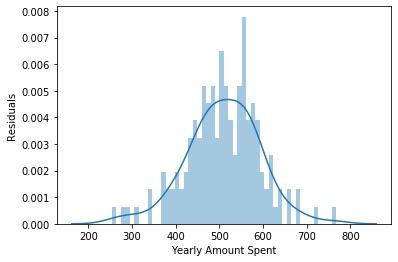

In [38]:
sns.distplot(pred_x_test, bins = 50, kde=True)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Residuals')

In [39]:
coefficients = pd.DataFrame(data=model.coef_.transpose(), index=x.columns, columns=['Profit Rate'])

In [41]:
coefficients

,Profit Rate
Avg. Session Length,25.403382
Time on App,39.076697
Time on Website,0.247090
Length of Membership,61.967717


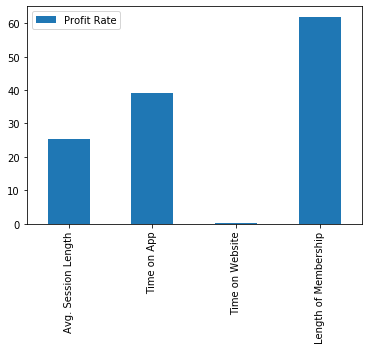

In [43]:
coefficients.plot.bar()